In [1]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt 
import seaborn as sns

### read dataset 

In [2]:
data = pd.read_csv(r"Data/financial_loan.csv")
data

,id,address_state,application_type,emp_length,emp_title,grade,home_ownership,issue_date,last_credit_pull_date,last_payment_date,...,sub_grade,term,verification_status,annual_income,dti,installment,int_rate,loan_amount,total_acc,total_payment
0,1077430,GA,INDIVIDUAL,< 1 year,Ryder,C,RENT,11-02-2021,13-09-2021,13-04-2021,...,C4,60 months,Source Verified,30000.0,0.0100,59.83,0.1527,2500,4,1009
1,1072053,CA,INDIVIDUAL,9 years,MKC Accounting,E,RENT,01-01-2021,14-12-2021,15-01-2021,...,E1,36 months,Source Verified,48000.0,0.0535,109.43,0.1864,3000,4,3939
2,1069243,CA,INDIVIDUAL,4 years,Chemat Technology Inc,C,RENT,05-01-2021,12-12-2021,09-01-2021,...,C5,36 months,Not Verified,50000.0,0.2088,421.65,0.1596,12000,11,3522
3,1041756,TX,INDIVIDUAL,< 1 year,barnes distribution,B,MORTGAGE,25-02-2021,12-12-2021,12-03-2021,...,B2,60 months,Source Verified,42000.0,0.0540,97.06,0.1065,4500,9,4911
4,1068350,IL,INDIVIDUAL,10+ years,J&J Steel Inc,A,MORTGAGE,01-01-2021,14-12-2021,15-01-2021,...,A1,36 months,Verified,83000.0,0.0231,106.53,0.0603,3500,28,3835
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
38571,803452,NJ,INDIVIDUAL,< 1 year,Joseph M Sanzari Company,C,MORTGAGE,11-07-2021,16-05-2021,16-05-2021,...,C1,60 months,Verified,100000.0,0.1986,551.64,0.1299,24250,33,31946
38572,970377,NY,INDIVIDUAL,8 years,Swat Fame,C,RENT,11-10-2021,16-04-2021,16-05-2021,...,C1,60 months,Verified,50000.0,0.0458,579.72,0.1349,25200,18,31870
38573,875376,CA,INDIVIDUAL,5 years,Anaheim Regional Medical Center,D,RENT,11-09-2021,16-05-2021,16-05-2021,...,D5,60 months,Verified,65000.0,0.1734,627.93,0.1749,25000,20,35721
38574,972997,NY,INDIVIDUAL,5 years,Brooklyn Radiology,D,RENT,11-10-2021,16-05-2021,16-05-2021,...,D5,60 months,Verified,368000.0,0.0009,612.72,0.1825,24000,9,33677


### Initial Exploration

In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 38576 entries, 0 to 38575
Data columns (total 24 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   id                     38576 non-null  int64  
 1   address_state          38576 non-null  object 
 2   application_type       38576 non-null  object 
 3   emp_length             38576 non-null  object 
 4   emp_title              37138 non-null  object 
 5   grade                  38576 non-null  object 
 6   home_ownership         38576 non-null  object 
 7   issue_date             38576 non-null  object 
 8   last_credit_pull_date  38576 non-null  object 
 9   last_payment_date      38576 non-null  object 
 10  loan_status            38576 non-null  object 
 11  next_payment_date      38576 non-null  object 
 12  member_id              38576 non-null  int64  
 13  purpose                38576 non-null  object 
 14  sub_grade              38576 non-null  object 
 15  te

In [4]:
data.describe()

,id,member_id,annual_income,dti,installment,int_rate,loan_amount,total_acc,total_payment
count,3.857600e+04,3.857600e+04,3.857600e+04,38576.000000,38576.000000,38576.000000,38576.000000,38576.000000,38576.000000
mean,6.810371e+05,8.476515e+05,6.964454e+04,0.133274,326.862965,0.120488,11296.066855,22.132544,12263.348533
std,2.113246e+05,2.668105e+05,6.429368e+04,0.066662,209.092000,0.037164,7460.746022,11.392282,9051.104777
min,5.473400e+04,7.069900e+04,4.000000e+03,0.000000,15.690000,0.054200,500.000000,2.000000,34.000000
25%,5.135170e+05,6.629788e+05,4.150000e+04,0.082100,168.450000,0.093200,5500.000000,14.000000,5633.000000
50%,6.627280e+05,8.473565e+05,6.000000e+04,0.134200,283.045000,0.118600,10000.000000,20.000000,10042.000000
75%,8.365060e+05,1.045652e+06,8.320050e+04,0.185900,434.442500,0.145900,15000.000000,29.000000,16658.000000
max,1.077501e+06,1.314167e+06,6.000000e+06,0.299900,1305.190000,0.245900,35000.000000,90.000000,58564.000000


In [53]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 38576 entries, 0 to 38575
Data columns (total 26 columns):
 #   Column                 Non-Null Count  Dtype         
---  ------                 --------------  -----         
 0   id                     38576 non-null  int64         
 1   address_state          38576 non-null  object        
 2   application_type       38576 non-null  object        
 3   emp_length             38576 non-null  object        
 4   emp_title              37138 non-null  object        
 5   grade                  38576 non-null  object        
 6   home_ownership         38576 non-null  object        
 7   issue_date             38576 non-null  datetime64[ns]
 8   last_credit_pull_date  38576 non-null  object        
 9   last_payment_date      38576 non-null  object        
 10  loan_status            38576 non-null  object        
 11  next_payment_date      38576 non-null  object        
 12  member_id              38576 non-null  int64         
 13  p

### Key Performance Indicators

#### 1. Total Loan Applications

In [19]:
total = data.id.count()
print(f"Total loan Application : {total}")

Total loan Application : 38576


#### MTD loan Application

In [75]:
latest_issue_date = data.issue_date.max()
latest_issue_month = latest_issue_date.month
latest_year = latest_issue_date.year

print(f'Latest issue Date : {latest_issue_date}')
print(f'Latest issue Month : {latest_issue_month}')
print(f'Latest issue year : {latest_year}')


mtd_date = data[(data.issue_date.dt.year == latest_year) & (data.issue_date.dt.month == latest_issue_month)] # filter the data only for latest month 

mtd_loan_application = mtd_date.id.count()

print(f"MTD Loan Application (for {latest_issue_date.strftime('%B %Y')}) : {mtd_loan_application}")

Latest issue Date : 2021-12-12 00:00:00
Latest issue Month : 12
Latest issue year : 2021
MTD Loan Application (for December 2021) : 4314


#### 2. Total funded Amount

In [24]:
funded_amount = data.loan_amount.sum()
print(f"Total funded Amount : {funded_amount}")

funded_amount_million = data.loan_amount.sum() / 1000000
print(f"Funded Amount : ${round(funded_amount_million,2)} million")

Total funded Amount : 435757075
Funded Amount : $435.76 million


In [58]:
mtd_funded_amount = data.groupby('issue_date')['loan_amount'].sum().reset_index().sort_values(by = 'issue_date',ascending=False)
mtd_funded_amount

,issue_date,loan_amount
64,2021-12-12,5000
63,2021-12-11,30866375
62,2021-12-10,13345500
61,2021-12-09,6485825
60,2021-12-08,2289500
...,...,...
4,2021-01-10,6540475
3,2021-01-09,2186225
2,2021-01-08,1761050
1,2021-01-05,12000


#### MTD Total funded Amount 

In [90]:
latest_issue_date = data.issue_date.max()
latest_month = latest_issue_date.month
latest_year = latest_issue_date.year

mtd_data = data[(data.issue_date.dt.year == latest_year) & (data.issue_date.dt.month == latest_month)]
mtd_funded_amount = mtd_data.loan_amount.sum()/1000000
print(f"MTD funded amount (for {latest_issue_date.strftime('%B %Y')}) : ${round(mtd_funded_amount,2)} Million ")

MTD funded amount (for December 2021) : $53.98 Million 


### 3. Total Amount Received 

In [93]:
# total received amount 
total_received_amount = data.total_payment.sum() / 1000000
print(f"Total Received Amount : ${round(total_received_amount,2)} Million")

Total Received Amount : $473.07 Million


#### MTD Received Amount 

In [105]:
latest_issue_date = data.issue_date.max()
latest_month = latest_issue_date.month
latest_year = latest_issue_date.year

mtd_data = data[(data.issue_date.dt.year == latest_year) & (data.issue_date.dt.month == latest_month)]
mtd_received_amount = mtd_data.total_payment.sum()/1000000
print(f"MTD Received amount (for {latest_issue_date.strftime('%B %Y')}) : ${round(mtd_received_amount,2)} Million ")

MTD Received amount (for December 2021) : $58.07 Million 


### 4. Average Interest Rate 

In [100]:
avg_int_rate = data.int_rate.mean()
print(f"Average Interest Rate : {round(avg_int_rate * 100,2)}%")

Average Interest Rate : 12.05%


#### MTD Average Interest Rate 

In [106]:
latest_issue_date = data.issue_date.max()
latest_month = latest_issue_date.month
latest_year = latest_issue_date.year

mtd_data = data[(data.issue_date.dt.year == latest_year) & (data.issue_date.dt.month == latest_month)]
mtd_avg_int_rate = mtd_data.int_rate.mean() * 100
print(f"MTD average interest rate (for {latest_issue_date.strftime('%B %Y')}) : {round(mtd_avg_int_rate,2)}% ")

MTD average interest rate (for December 2021) : 12.36% 


### 5. Debt to Income Ratio

In [110]:
dbt_ratio = data.dti.mean() * 100
print(f"Average Debt To Income Ratio : {round(dbt_ratio,2)}%")

Average Debt To Income Ratio : 13.33%


#### MTD Average Debt To Income Ratio

In [112]:
latest_issue_date = data.issue_date.max()
latest_month = latest_issue_date.month
latest_year = latest_issue_date.year

mtd_data = data[(data.issue_date.dt.year == latest_year) & (data.issue_date.dt.month == latest_month)]
mtd_avg_dti = mtd_data.dti.mean() * 100
print(f"MTD average interest rate (for {latest_issue_date.strftime('%B %Y')}) : {round(mtd_avg_dti,2)}% ")

MTD average interest rate (for December 2021) : 13.67% 


### Good Loan Matrics 

In [129]:
good_loan = data[(data.loan_status == 'Fully Paid') | (data.loan_status == 'Current')]
total_application = data.id.count()

## Good Loan Application 
good_loan_application = good_loan.id.count()
good_loan_funded_amount = good_loan.loan_amount.sum() / 1000000
good_loan_received_amount = good_loan.total_payment.sum() / 1000000
good_loan_pct = (good_loan_application / total_application) * 100

print(f"Good Loan Application : {good_loan_application}")
print(f"Good Loan Funded Amount : ${round(good_loan_funded_amount,2)}M")
print(f"Good Loan Received Amount : ${round(good_loan_received_amount,2)}M")
print(f"Good Loan percentage : {round(good_loan_pct,2)}%")

Good Loan Application : 33243
Good Loan Funded Amount : $370.22M
Good Loan Received Amount : $435.79M
Good Loan percentage : 86.18%


### Bad Loan Metrics

In [132]:
bad_loan = data[(data.loan_status == 'Charged Off')]
total_application = data.id.count()

## Good Loan Application 
bad_loan_application = bad_loan.id.count()
bad_loan_funded_amount = bad_loan.loan_amount.sum() / 1000000
bad_loan_received_amount = bad_loan.total_payment.sum() / 1000000
bad_loan_pct = (bad_loan_application / total_application) * 100

print(f"Bad Loan Application : {bad_loan_application}")
print(f"Bad Loan Funded Amount : ${round(bad_loan_funded_amount,2)}M")
print(f"Bad Loan Received Amount : ${round(bad_loan_received_amount,2)}M")
print(f"Bad Loan percentage : {round(bad_loan_pct,2)}%")

Bad Loan Application : 5333
Bad Loan Funded Amount : $65.53M
Bad Loan Received Amount : $37.28M
Bad Loan percentage : 13.82%


### Monthly Trends By Issue Date for Loan Application


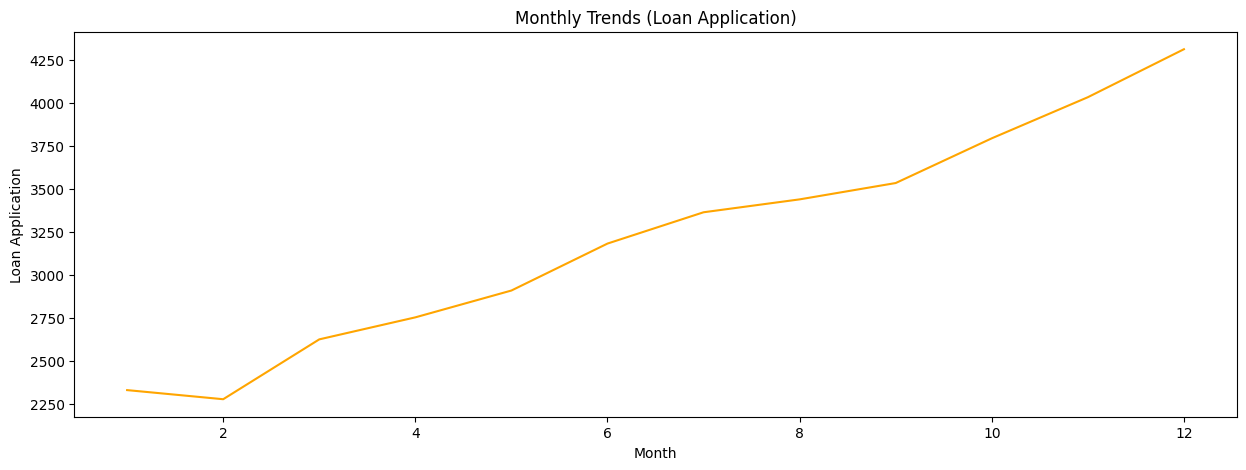

In [142]:
data['month'] = data.issue_date.dt.month

monthly_loan_application = data.groupby('month')['id'].count().reset_index()

plt.figure(figsize = (15,5))
plt.plot(monthly_loan_application.month, monthly_loan_application.id, color = 'orange')
plt.xlabel('Month')
plt.ylabel('Loan Application')
plt.title("Monthly Trends (Loan Application)")
plt.show()

### Monthly Trends By Issue Date for Total Funded Amount


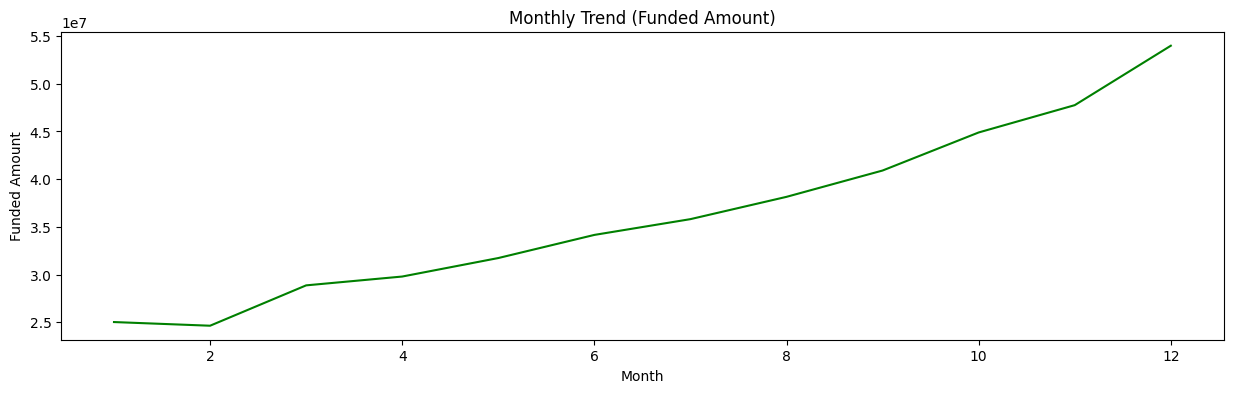

In [150]:
monthly_funded_amount = data.groupby('month')['loan_amount'].sum().reset_index()
monthly_received_amount = data.groupby('month')['total_payment'].sum().reset_index()


def line_plot(x, y, color, xlabel, ylabel, Title):
    plt.figure(figsize=(15,4))
    plt.plot(x,y,color)
    plt.xlabel(xlabel)
    plt.ylabel(ylabel)
    plt.title(Title)
    plt.show()


line_plot(
    monthly_funded_amount.month, monthly_funded_amount.loan_amount, 'green',
    'Month', 'Funded Amount',
    'Monthly Trend (Funded Amount)'
)

[]

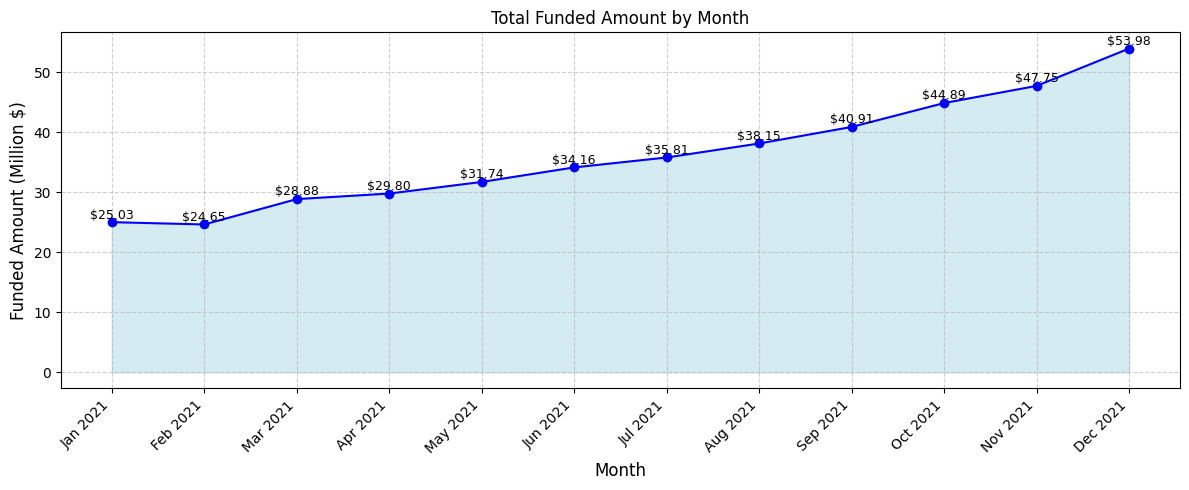

In [175]:
monthly_funded = (
    data.sort_values('issue_date')
    .assign(month_name=lambda x: x.issue_date.dt.strftime('%b %Y'))
    .groupby('month_name', sort=False)['loan_amount']
    .sum()
    .div(1000000)
    .reset_index() # Step 1: Resets the index, turning 'month_name' into a column
    # Step 2: Use .rename() to change the name of the 'loan_amount' column
    .rename(columns={'loan_amount': 'loan_amount_million'})
)

plt.figure(figsize=(12,5))
plt.fill_between(monthly_funded.month_name, monthly_funded.loan_amount_million, color='lightblue', alpha=0.5)
plt.plot(monthly_funded.month_name, 
         monthly_funded.loan_amount_million, 
         marker='o',
         color='blue' )

for idx, rows in monthly_funded.iterrows():
    plt.text(
        idx, 
        rows['loan_amount_million'] + 0.1, 
        f"${rows['loan_amount_million']:.2f}", 
        ha='center', 
        va='bottom',
        fontsize=9,
        color='black'
    )

plt.title("Total Funded Amount by Month")
plt.xlabel("Month", fontsize=12)
plt.ylabel("Funded Amount (Million $)", fontsize=12)
plt.xticks(
    ticks=range(len(monthly_funded)),
    labels=monthly_funded.month_name,
    rotation=45,
    ha='right' # Align labels to the right for rotation readability
)
plt.grid(True, linestyle='--', alpha=0.6)
plt.tight_layout()
plt.plot()

### Monthly Trends By Issue Date for Total Received Amount

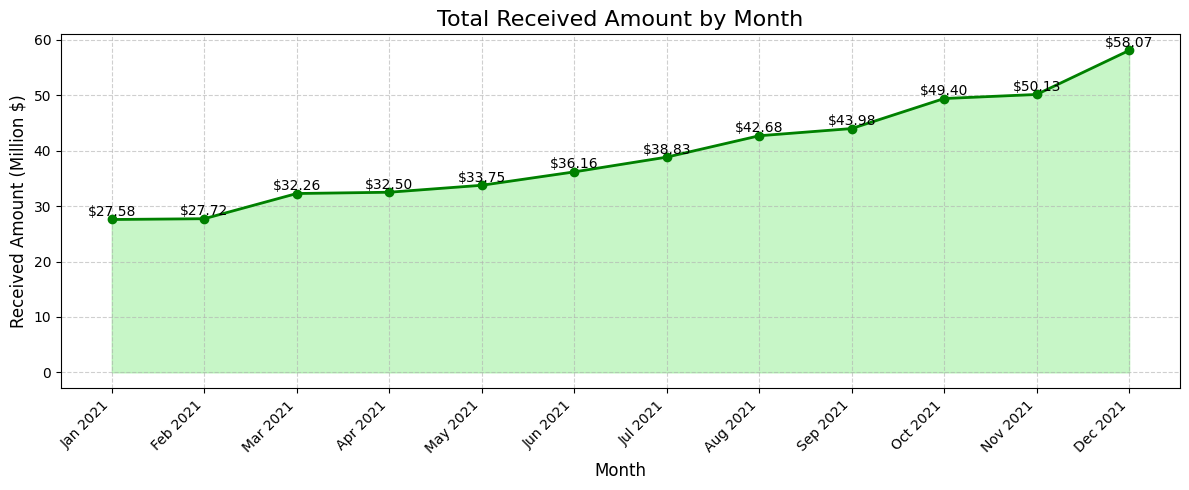

In [178]:
monthly_received = (
    data.sort_values('issue_date')
    .assign(month_name=lambda x: x.issue_date.dt.strftime('%b %Y'))
    .groupby('month_name', sort=False)['total_payment']
    .sum()
    .div(1000000)
    .reset_index()
    .rename(columns={'total_payment': 'received_amount_million'})
)

x_ticks = np.arange(len(monthly_received))

plt.figure(figsize=(12, 5))

plt.fill_between(
    x_ticks, 
    monthly_received.received_amount_million, 
    color='lightgreen', 
    alpha=0.5
)
plt.plot(
    x_ticks, 
    monthly_received.received_amount_million, 
    color='green',
    marker='o', # Add a marker for clarity on line plot
    linewidth=2
)
for idx, rows in monthly_received.iterrows():
    plt.text(
        idx, 
        rows['received_amount_million'] + 0.1, 
        f"${rows['received_amount_million']:.2f}",
        ha='center', 
        va='bottom',
        fontsize=10,
        color='black'
    )

plt.title("Total Received Amount by Month", fontsize=16)
plt.xlabel("Month", fontsize=12)
plt.ylabel("Received Amount (Million $)", fontsize=12)


plt.xticks(
    ticks=x_ticks,
    labels=monthly_received.month_name, 
    rotation=45,
    ha='right'
)

plt.grid(True, linestyle='--', alpha=0.6)
plt.tight_layout()
plt.show() 

### Monthly Trend by Loan Application 

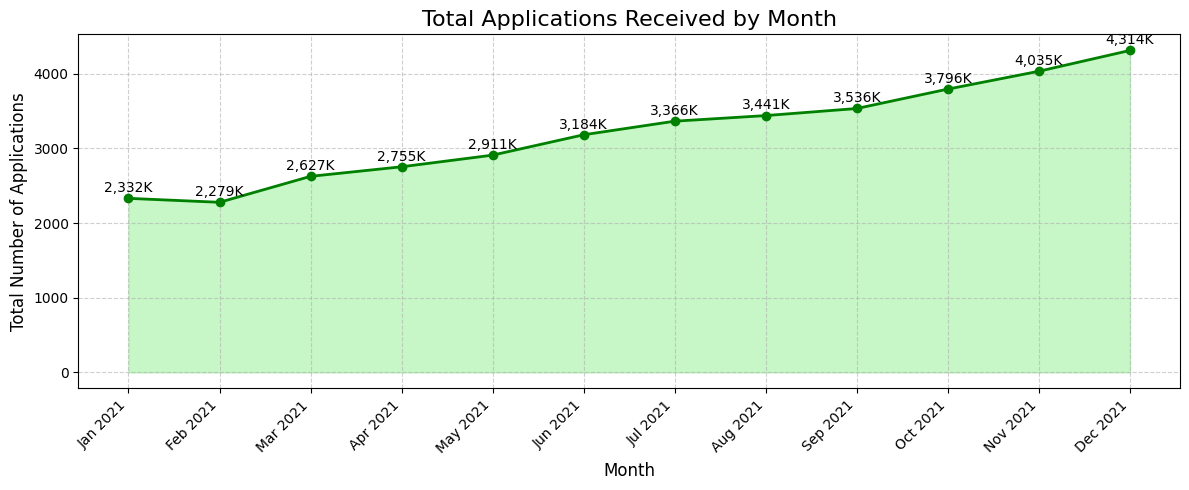

In [183]:
# --- Assuming the monthly_received calculation remains the same ---
# monthly_received now has columns: 'month_name' and 'total_application'

x_ticks = np.arange(len(monthly_received))

plt.figure(figsize=(12, 5))

# 1. Change fill_between to a new color (e.g., 'skyblue')
plt.fill_between(
    x_ticks, 
    monthly_received.total_application, 
    color='lightgreen',  # Changed from 'lightgreen'
    alpha=0.5
)
# 2. Change plot line color (e.g., 'navy')
plt.plot(
    x_ticks, 
    monthly_received.total_application, 
    color='green',  # Changed from 'green'
    marker='o',
    linewidth=2
)

# 3. Change text color (e.g., 'darkred' for visibility)
for idx, rows in monthly_received.iterrows():
    application_count = rows['total_application']
    
    plt.text(
        idx,
        application_count + (monthly_received.total_application.max() * 0.01),
        f"{application_count:,.0f}K", 
        ha='center',
        va='bottom',
        fontsize=10,
        color='black' # Changed from 'black'
    )

# --- Axis Formatting remains the same ---
plt.title("Total Applications Received by Month", fontsize=16)
plt.xlabel("Month", fontsize=12)
plt.ylabel("Total Number of Applications", fontsize=12)

plt.xticks(
    ticks=x_ticks,
    labels=monthly_received.month_name, 
    rotation=45,
    ha='right'
)

plt.grid(True, linestyle='--', alpha=0.6)
plt.tight_layout()
plt.show()

### Regional Analysis by Sales by Total Funded Amount

C:\Users\vrush\AppData\Local\Temp\ipykernel_9832\1426679619.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.barplot(


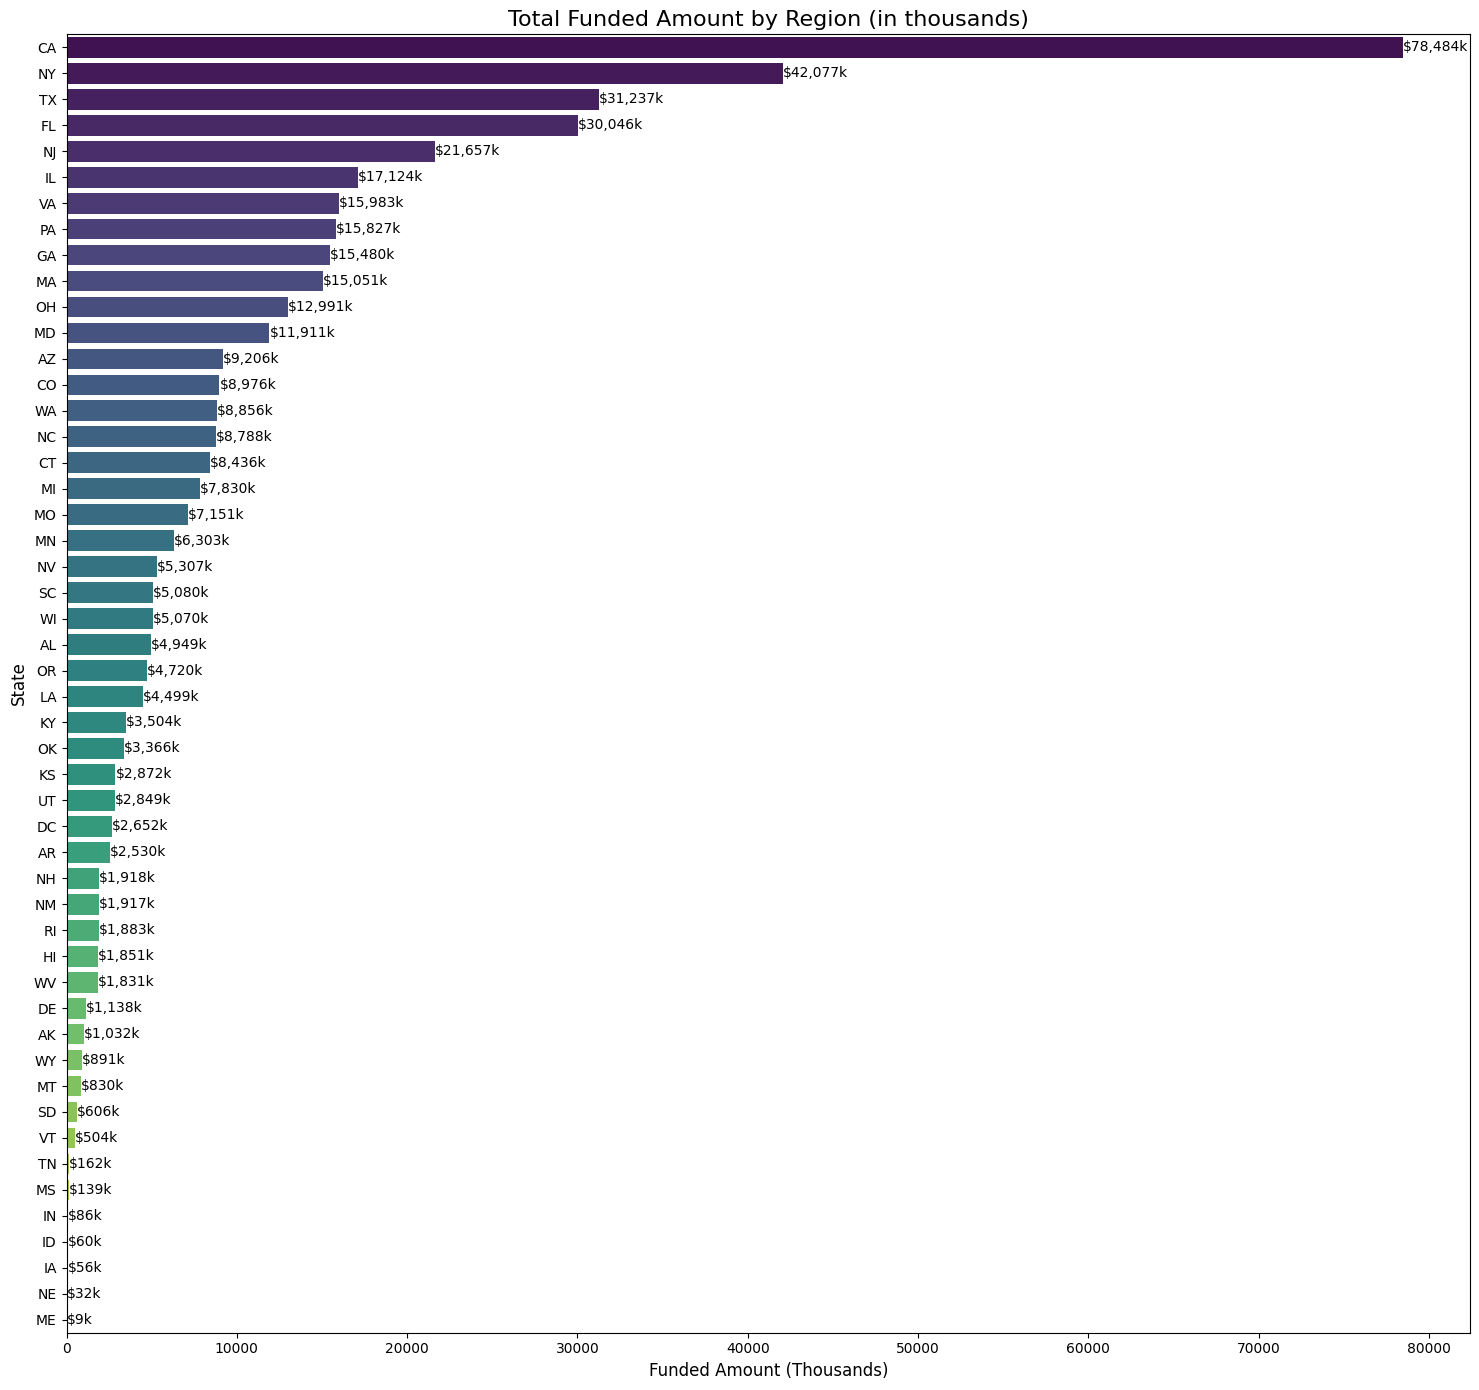

In [199]:
regional_funded_amount = data.groupby('address_state')['loan_amount'].sum().sort_values(ascending=False).reset_index()

regional_funded_amount['loan_amount_thousand'] = regional_funded_amount['loan_amount'] / 1000

plt.figure(figsize=(15, 14))
ax = sns.barplot(
    data=regional_funded_amount,
    x='loan_amount_thousand', # Plot the scaled amount
    y='address_state',
    palette='viridis' # Optional: Adds color
)

for container in ax.containers:
    ax.bar_label(container, fmt='$'+'{:,.0f}'+'k') 

ax.set_title("Total Funded Amount by Region (in thousands)", fontsize=16)
ax.set_xlabel("Funded Amount (Thousands)", fontsize=12)
ax.set_ylabel("State", fontsize=12)
plt.tight_layout()
plt.show()

### Regional Analysis by Total Received Amount 

C:\Users\vrush\AppData\Local\Temp\ipykernel_9832\211115477.py:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.barplot(


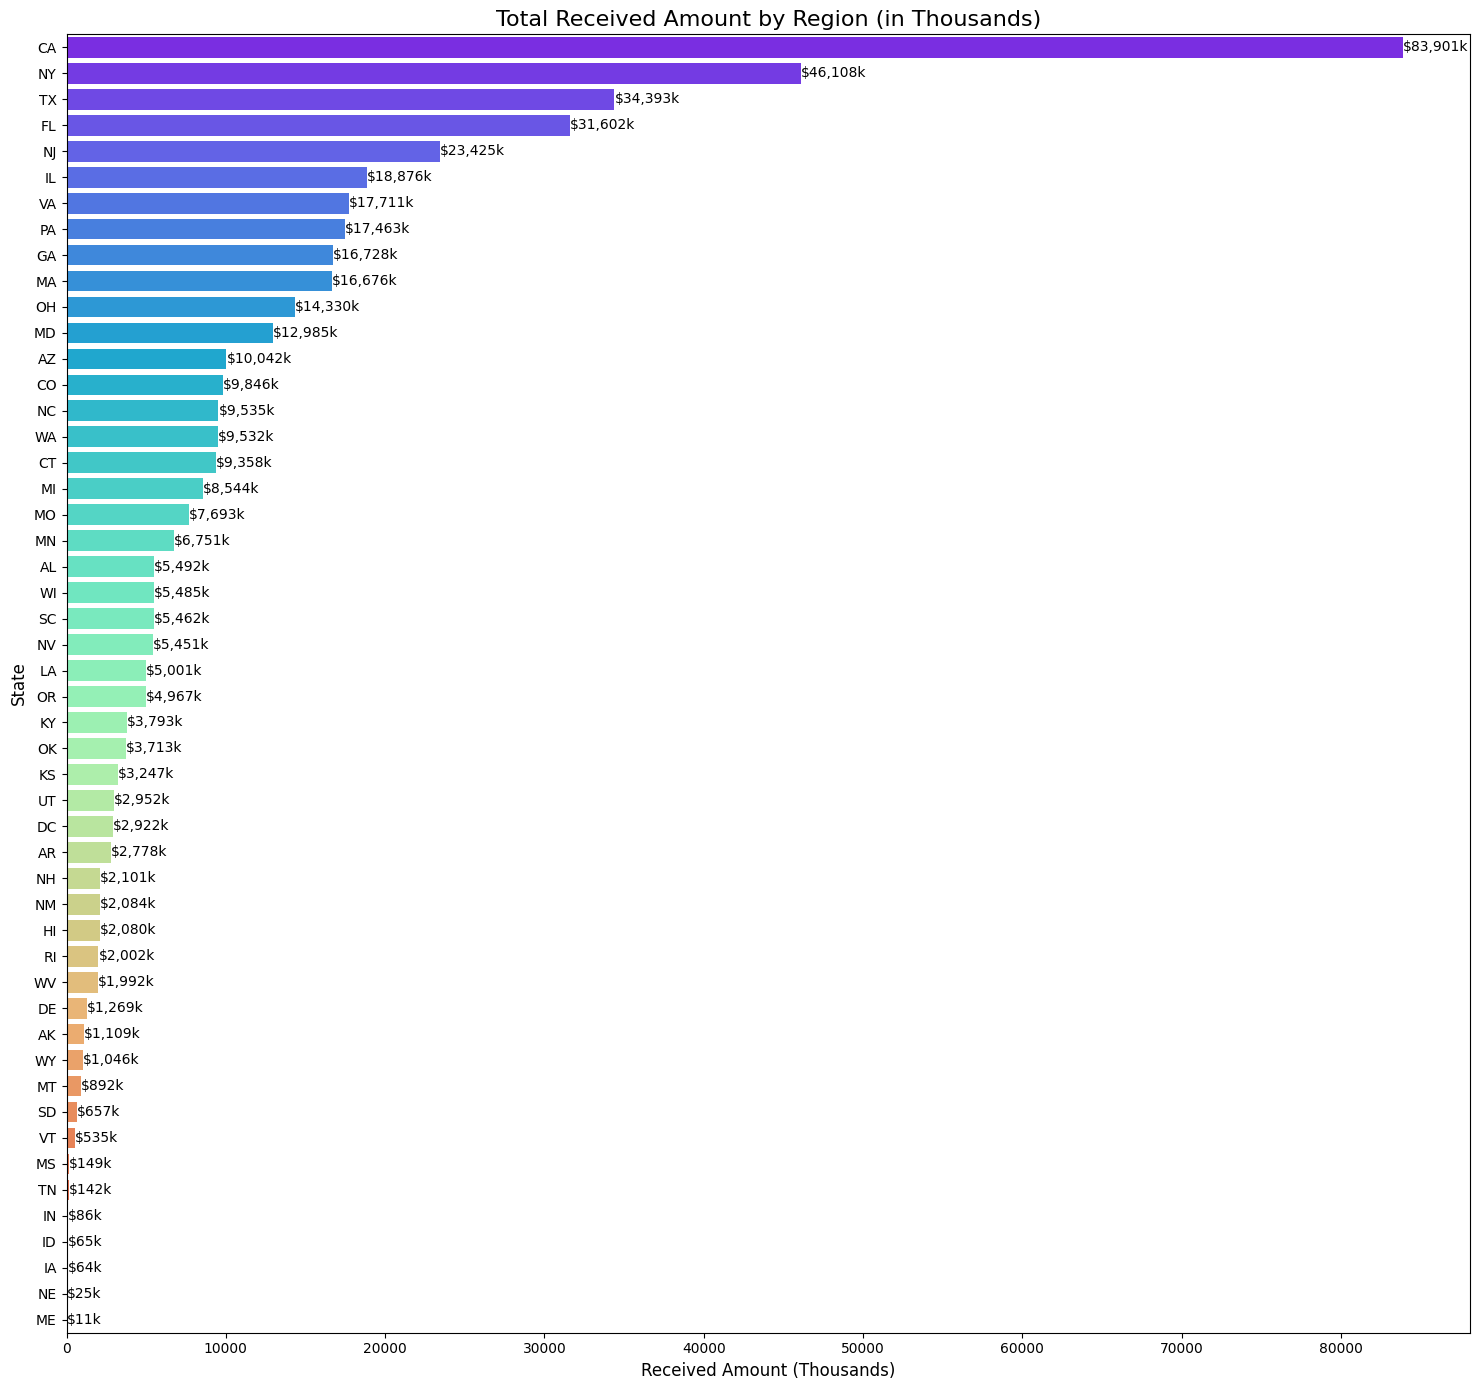

In [206]:
regional_received_amount = data.groupby('address_state')['total_payment'].sum().sort_values(ascending=False).reset_index()

regional_received_amount['received_amount_thousand'] = regional_received_amount['total_payment'] / 1000

regional_received_amount = regional_received_amount.drop(columns=['total_payment'])

plt.figure(figsize=(15, 14))

ax = sns.barplot(
    data=regional_received_amount, 
    x='received_amount_thousand',
    y='address_state',
    palette='rainbow' 
)

for container in ax.containers:
    ax.bar_label(container, fmt='$'+'{:,.0f}'+'k') 

ax.set_title("Total Received Amount by Region (in Thousands)", fontsize=16)
ax.set_xlabel("Received Amount (Thousands)", fontsize=12)
ax.set_ylabel("State", fontsize=12)

plt.tight_layout()
plt.show()


### Regional Analysis by Total Loan Application

C:\Users\vrush\AppData\Local\Temp\ipykernel_9832\2797231509.py:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.barplot(


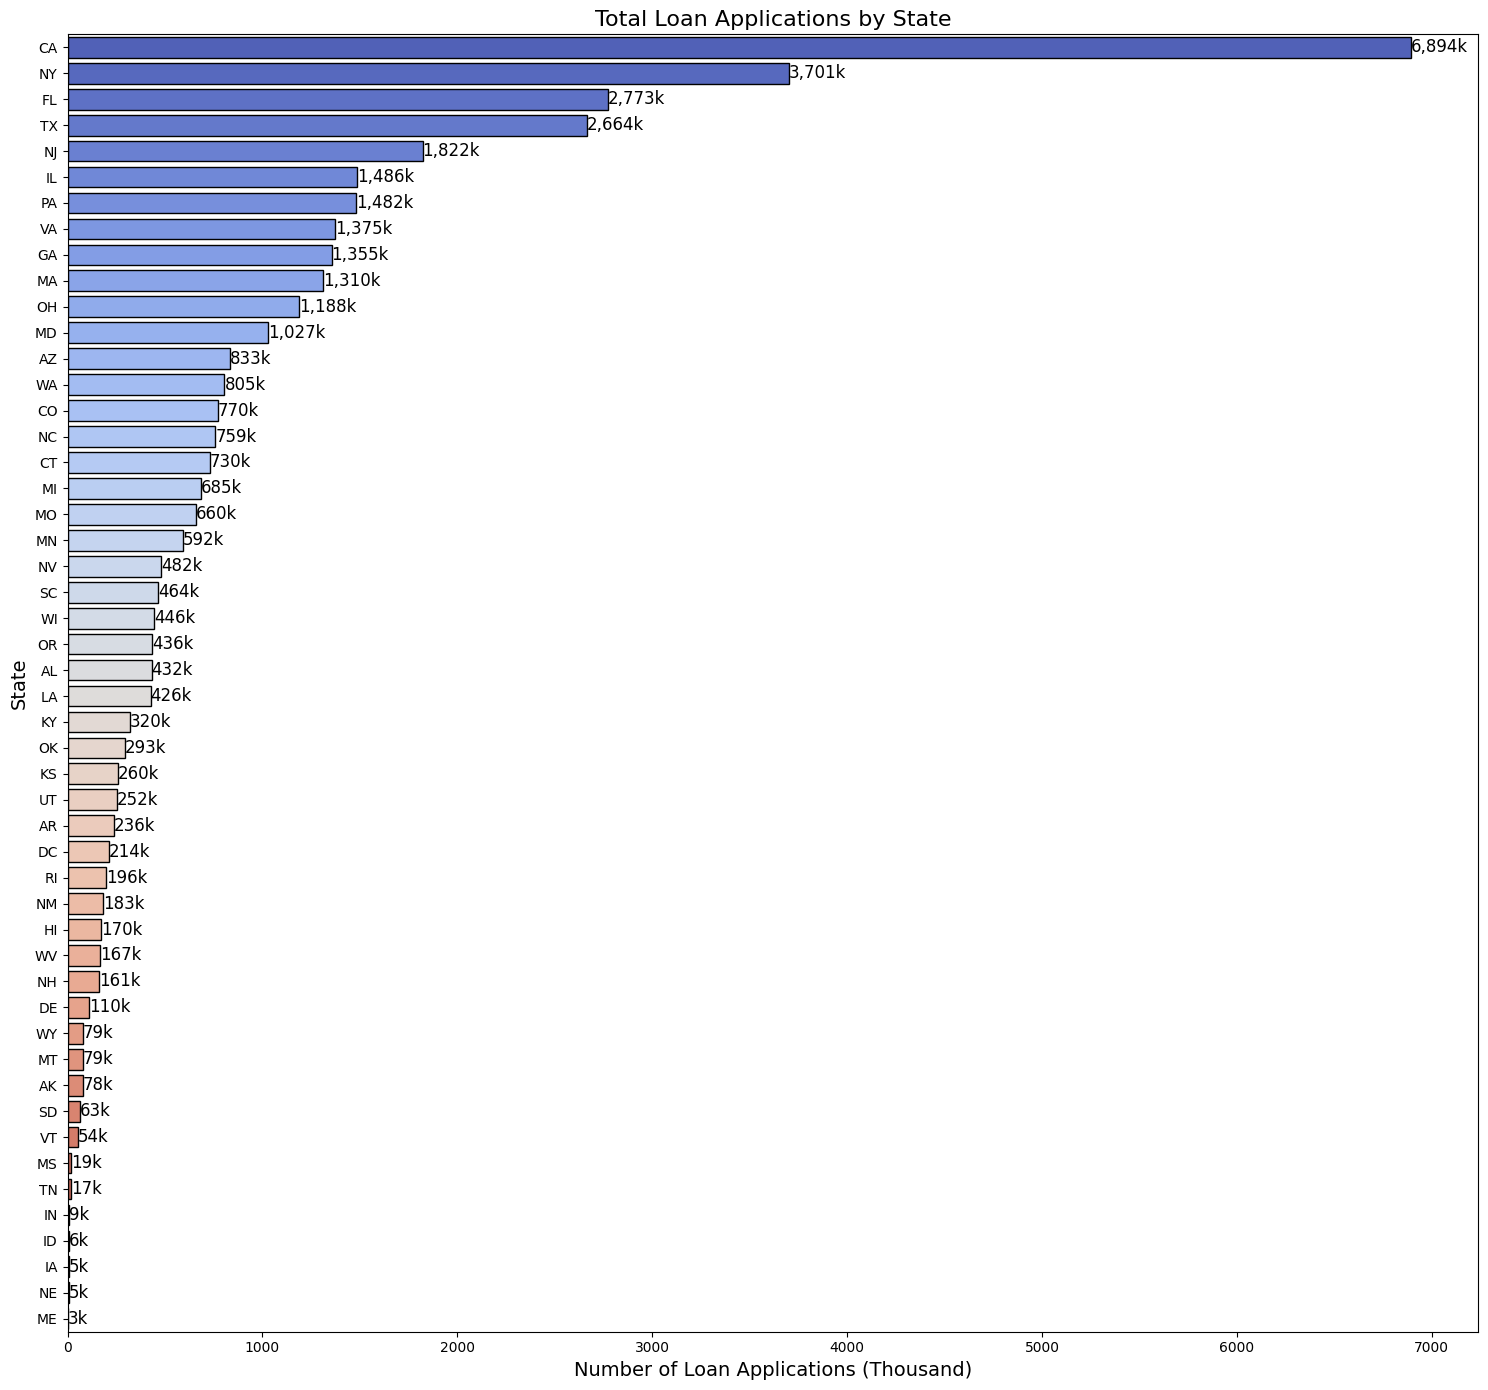

In [218]:

regional_loan_application = data.groupby('address_state')['id'].count().sort_values(ascending=False).reset_index()

regional_loan_application = regional_loan_application.rename(columns={'id': 'loan_application_count'})

plt.figure(figsize=(15, 14))

ax = sns.barplot(
    data=regional_loan_application, 
    x='loan_application_count',
    y='address_state',
    palette='coolwarm',
    edgecolor='black'
)

for container in ax.containers:
    ax.bar_label( container, fmt='{:,.0f}'+'k', fontsize=12) 

ax.set_title("Total Loan Applications by State", fontsize=16)
ax.set_xlabel("Number of Loan Applications (Thousand)", fontsize=14)
ax.set_ylabel("State", fontsize=14)

plt.tight_layout()
plt.show()